In [2]:
## Primary production and respiration are SO important for the biological carbon pump which makes sense why we're going to..
## ..try and evaluate them in thermodyanic coordinates!

import xarray as xr
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import cm


In [5]:
## Let's start by calling in our directories and files

rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'

# Annual data 
datadir_ann = 'ocean_cobalt_omip_rates_year_z/ts/annual/5yr/'
filename_ann_pp = 'ocean_cobalt_omip_rates_year_z.0711-0715.pp.nc'
filename_ann_vol = 'ocean_cobalt_omip_rates_year_z.0711-0715.volcello.nc'

datadir_temp = 'ocean_annual_z/ts/annual/5yr/'
filename_temp = 'ocean_annual_z.0711-0715.thetao.nc'

# Monthly data
datadir_mon_bgc = 'ocean_cobalt_omip_tracers_month_z/av/monthly_5yr/'
filename_mon_bgc = 'ocean_cobalt_omip_tracers_month_z.0711-0715.*.nc'


datadir_mon_phys = 'ocean_monthly_z/av/monthly_5yr/'
filename_mon_phys = 'ocean_monthly_z.0711-0715.*.nc'




In [5]:
# Annual data

bgc_ann_pp = xr.open_dataset(rootdir+datadir_ann+filename_ann_pp)
phys_ann_vol = xr.open_dataset(rootdir+datadir_ann+filename_ann_vol)
temp_ann = xr.open_dataset(rootdir+datadir_temp+filename_temp)


In [7]:
# Monthly Data 

bgc_mon_variables = xr.open_mfdataset(rootdir+datadir_mon_bgc+filename_mon_bgc)
phys_mon_variables = xr.open_mfdataset(rootdir+datadir_mon_phys+filename_mon_phys)

In [7]:
# Annual data

ds = xr.merge([bgc_ann_pp, phys_ann_vol, temp_ann])

# Monthly data 

dt = xr.merge([bgc_mon_variables.pp, phys_mon_variables.thetao, bgc_mon_variables.volcello])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/pyt

In [8]:
# Annual primary production x volume variable 

pV_ann = ds.pp * ds.volcello
pV_ann.name = 'pV_ann'
ds = xr.merge([ds, pV_ann])

# Monthly primary production x volume variable 

pV_mon = dt.pp * dt.volcello
pV_mon.name = 'pV_mon'
dt = xr.merge([dt, pV_mon])

In [9]:
# Annual temperature binning 

ds = ds.set_coords('thetao')

# Monthly temperature binning 

dt = dt.set_coords('thetao')

theta_bins = np.arange(-2,30,2)

In [11]:
ds

<xarray.Dataset>
Dimensions:     (nv: 2, time: 5, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0711-07-02 12:00:00 ... 0715-07-02 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    thetao      (time, z_l, yh, xh) float32 ...
Data variables:
    average_DT  (time) timedelta64[ns] 365 days 365 days ... 365 days 365 days
    average_T1  (time) object 0710-07-08 00:00:00 ... 0714-07-07 00:00:00
    average_T2  (time) object 0711-07-08 00:00:00 ... 0715-07-07 00:00:00
    pp          (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object 0711-01-01 00:00:00 ... 0716-01-01 00:00:00
    volcello    (time, z_l, yh, xh) float32 ...
    pV_

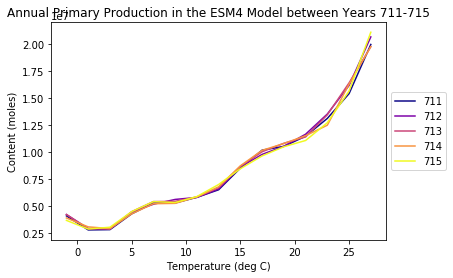

In [13]:
#### Let's start off with the ANNUAL primary production graph 
## This will be for the entire ocean 

labels = ["711", "712", "713", "714", "715"]
colors = cm.get_cmap('plasma',5).colors 

for t in range(5):

    pV_in_theta = ds.pV_ann.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
 
    p_vsum = pV_in_theta.sum(xr.ALL_DIMS)
    
    p_vsum.plot(label=labels[t], color=colors[t,:])
       
    
plt.title('Annual Primary Production in the ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Moles per second')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

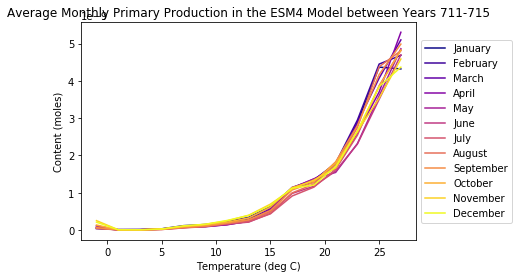

In [15]:
## Now let's graph average MONTHLY rates of primary production over a period of 5 years 
#This is measured as a volume weighted mean 

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = cm.get_cmap('plasma',12).colors 

for t in range(12):
    pV_in_theta = dt.pV_mon.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
    V_in_theta = dt.volcello.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
 
    pV_sum = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS) 
       

    pV_sum.plot(label=labels[t], color=colors[t,:])
    
plt.title('Average Monthly Primary Production in the ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Content (moles)')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

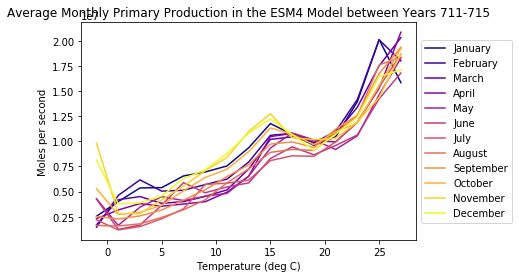

In [16]:
# Let's try the above graph as just mol per second

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = cm.get_cmap('plasma',12).colors 

for t in range(12):
    pV_in_theta = dt.pV_mon.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
    #V_in_theta = dt.volcello.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
 
    pV_sum = pV_in_theta.sum(xr.ALL_DIMS)#/V_in_theta.sum(xr.ALL_DIMS) 
       

    pV_sum.plot(label=labels[t], color=colors[t,:])
    
plt.title('Average Monthly Primary Production in the ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Moles per second')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))


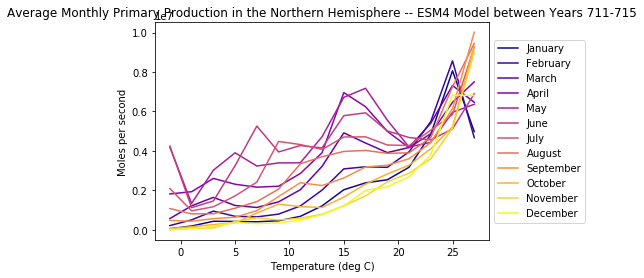

In [17]:
## Okay the moles per second graph is tells a WAY better story! 
## Let's split it up into hemispheres!
# We're going to start off with the Northern Hemisphere

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = cm.get_cmap('plasma',12).colors 

for t in range(12):
    pV_in_theta = dt.pV_mon.isel(time=t,yh=range(288,576)).groupby_bins('thetao',theta_bins)
    
 
    pV_sum = pV_in_theta.sum(xr.ALL_DIMS)
       

    pV_sum.plot(label=labels[t], color=colors[t,:])
    
plt.title('Average Monthly Primary Production in the Northern Hemisphere -- ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Moles per second')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

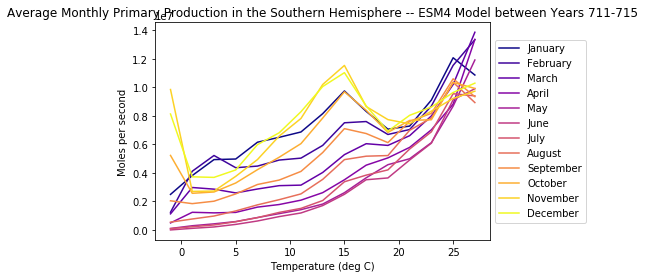

In [18]:
## And the Southern hemisphere..! 

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = cm.get_cmap('plasma',12).colors 

for t in range(12):
    pV_in_theta = dt.pV_mon.isel(time=t,yh=range(0,288)).groupby_bins('thetao',theta_bins)
    
 
    pV_sum = pV_in_theta.sum(xr.ALL_DIMS)
       

    pV_sum.plot(label=labels[t], color=colors[t,:])
    
plt.title('Average Monthly Primary Production in the Southern Hemisphere -- ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Moles per second')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))